# Assignment 10, Part 2: Data Wrangling

*Learn to prepare data for visualization and analytics.*


## Instructions
This tutorial provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  This tutorial is accompanied by a practice notebook with the exact same name but with a `-Practice` suffix.  Throughout this tutorial sections labeled "Practice Task" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png).

You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. 

## Introduction
The purpose of this assignment is to build on Tidy data cleaning by using Python tools to "massage" or "wrangle" data into formats that are most useful for visualization and analytics.

**What is data wrangling?**

> Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. 

- [Data Wangling](https://en.wikipedia.org/wiki/Data_wrangling) *Wikipedia*

Previously, we learned about Tidy rules for reformatting data.  Transforming data into a Tidy dataset is data wrangling.  We will build on Tidy by introducing some other useful Python functions.

---
## 1. Getting Started
As before, we import any needed packages at the top of our notebook. Let's import Numpy, Pandas, Seaborn and matplotlib:

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Task 1a: Setup

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Import the following packages:
+ `pandas` as `pd`
+ `numpy` as `np`
+ `matplotlib.pyplot` as `plt`
+ `Seaborn` as `sns`

Activate the `%matplotlib inline` magic.

---
## 2. Data Exploration
The first step in any data analytics task is import and exploration of data.  At this point, we have learned all of the steps we need to identify the data columns, their data types, recognize where we have missing values and recognize categorical and numeric variables in the data.   

For this tutorial we will use a dataset named "Abolone" from the [University of California Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone). The datafile is named `abalone.data` and has been provided to you (no need to download it).  The data has 10 "attributes" or variables. The following table describes these 10 variables, their types, and additional details.

<table>
    <tr><th>Name</th><th>Data Type</th><th>Metric</th><th>Description</th></tr>
    <tr><td>Sample ID</td><td>integer</td><td></td><td>A unique number for each sample taken</td></tr>
    <tr><td>Sex</td><td>nominal</td><td></td><td>M = 0, F = 1, and I = 2 (infant)</td></tr>
	<tr><td>Length</td><td>continuous</td><td>mm</td><td>Longest shell measurement</td></tr>
	<tr><td>Diameter</td><td>continuous</td><td>mm</td><td>perpendicular to length</td></tr>
	<tr><td>Height</td><td>continuous</td><td>mm</td><td>with meat in shell</td></tr>
	<tr><td>Whole weight</td><td>continuous</td><td>grams</td><td>whole abalone</td></tr>
	<tr><td>Shucked weight</td><td>continuous</td><td>grams</td><td>weight of meat</td></tr>
	<tr><td>Viscera weight</td><td>continuous</td><td>grams</td><td>gut weight (after bleeding)</td></tr>
	<tr><td>Shell weight</td><td>continuous</td><td>grams</td><td>after being dried</td></tr>
	<tr><td>Rings</td><td>integer</td><td></td><td>+1.5 gives the age in years</td></tr>
</table>

***Note:*** To demonstrate specific techniques of data wrangling, the dataset provided to you was altered: a sample ID column was added, the Sex column contains numeric IDs, and missing values were added as were duplicates.

Place this dataset into a `data` folder within the same directory as this notebook and import the data. This data has no header information, so, we'll provide it when we import the data:

In [3]:
abalone = pd.read_csv('abalone.data', sep=',', header = None)
abalone.columns = ['Sample_ID', 'Sex', 'Length', 'Diameter', 'Height', 
          'Whole_weight', 'Shucked_weight', 'Viscera_weight', 
          'Shell_weight', 'Rings']
abalone.head()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1000,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1001,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1002,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1003,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1004,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 2.1 Exploring Data Types
First, let's explore how Pandas imported the data types:

In [4]:
abalone.dtypes

Sample_ID           int64
Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

Other than the first and last columns, all others were imported as `float64` which is a decimal value. The first column was imported as an `object` which is a string, and the last column was imported as a an `integer`.  This looks correct for the data.

Let's get a sense of how big the data is:

In [5]:
abalone.shape

(4186, 10)

In [6]:
abalone.sem() #get it to show standard error

Sample_ID         18.652704
Sex                0.012801
Length             0.001860
Diameter           0.001537
Height             0.000647
Whole_weight       0.007586
Shucked_weight     0.003435
Viscera_weight     0.001696
Shell_weight       0.002154
Rings              0.049811
dtype: float64

Next, we can explore the distribution of numerical data using the `describe` function:

In [7]:
abalone.describe() #get it to show standard error

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4186.000000,4186.000000,4184.000000,4185.000000,4186.000000,4185.000000,4186.000000,4185.000000,4186.000000,4186.000000
mean,3086.700669,0.955805,0.523635,0.407621,0.139406,0.827486,0.358964,0.180390,0.238535,9.930244
std,1206.816977,0.828239,0.120323,0.099446,0.041890,0.490774,0.222266,0.109723,0.139352,3.222740
min,1000.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,2039.250000,0.000000,0.450000,0.350000,0.115000,0.440500,0.185125,0.092500,0.130000,8.000000
50%,3085.500000,1.000000,0.545000,0.425000,0.140000,0.798000,0.335500,0.170500,0.233000,9.000000
75%,4131.750000,2.000000,0.615000,0.480000,0.165000,1.153000,0.501500,0.252500,0.328500,11.000000
max,5178.000000,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# to get describe per every group of replicates in a column
# df.groupby(by="Genotype").apply(lambda x: x.describe())

Observe that even though the 'Sex' column was provided as a numeric value, it is actually categorical, with each sex represented as a unique number.  We can explore the categorical data using the `groupby` function, followed by the `size` function.

In [9]:
abalone.groupby(by=['Sex']).size() #check all the categorical columns

Sex
0    1532
1    1307
2    1347
dtype: int64

### 2.2 Finding Missing Values
Before proceeding with any analysis you should know the state of missing values in the dataset.  For most analytics missing values are not supported. Some tools will automatically ignore them but it may be easier, in some cases, to remove them.

First, let's quantify how many missing values we have. The `isna` function will convert the data into `True` or `False` values: `True` if the value is missing:

In [10]:
abalone.isna().head() #look for missing value sin yoir data cuase your tools can deal with them soemtimes they dont

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


We can use the `sum` function to then identify how many missing values we have per column:

In [11]:
abalone.isna().sum()

Sample_ID         0
Sex               0
Length            2
Diameter          1
Height            0
Whole_weight      1
Shucked_weight    0
Viscera_weight    1
Shell_weight      0
Rings             0
dtype: int64

### 2.3 Inspecting Duplicates
Sometimes we may or may not want duplicates in the data. This depends on the expectations of the experiments and the measurements taken. Sometimes duplicates may represent human error in data entry. So, let's look for duplicated data.  We have 4,184 rows, let's see how many unique values per column that we have:

In [12]:
abalone.nunique()

Sample_ID         4179
Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

For all of the columns we have fewer that 4,184 values.  For columns like 'Sex' we have 3 unique values, but these repeated values are expected.  The decimal values also have duplicates. The likelihood of seeing the exact same decimal values varies based on the distribution for the variable and the number of decimal values in the measurement.  The number of duplicated values does not seem unordinary.  However, the sample ID should be unique, yet we have 4,177 of them instead of 4,184. This implies we have duplicated samples in the data. 

We can identify then umber of duplicated 'Sample_ID' values are in the data by using the `duplicated` function. 

In [13]:
abalone.duplicated(subset='Sample_ID').sum() #seven rows are duplicated ie they id that is another row

7

We have 7 duplicated rows. Now let's see which rows have duplicated samples:

In [14]:
abalone[abalone.duplicated(subset='Sample_ID', keep= False)]

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
711,1711,0,0.375,0.300,0.100,0.2465,0.1040,0.0475,0.0830,11
712,1712,2,0.280,0.205,0.055,0.1135,0.0450,0.0275,0.0335,7
713,1713,0,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695,8
714,1714,0,0.350,0.255,0.080,0.1915,0.0800,0.0385,0.0630,9
715,1715,2,0.275,0.200,0.065,0.1035,0.0475,0.0205,0.0300,7
716,1716,2,0.290,0.205,0.070,0.0975,0.0360,0.0190,0.0350,8
717,1717,2,0.250,0.190,0.060,0.0765,0.0360,0.0115,0.0245,6
4179,1711,0,0.375,0.300,0.100,0.2465,0.1040,0.0475,0.0830,11
4180,1712,2,0.280,0.205,0.055,0.1135,0.0450,0.0275,0.0335,7
4181,1713,0,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695,8


It looks like the rows are exact duplicates, so this was probably human entry error. We need to remove the copies rows. We will do so in the **3.1 Filtering** section below.

---
## 3. Cleanup
### 3.1 Correcting Data Types
During the data exploration phase above, we noticed that the Sex column was provided as a nuumber to represent the Sex category, and therefore, Pandas imported that column as a numeric value. We need to convert that to a categorical value, because the meaning of the column is not ordinal or numeric we should covert it to a string object.

We can do that with two functions that work on Series:  
- `astype`  converts the type of data in the series. 
- `replace`  replaces values in the series.

We'll use `astype` to convert the column to a string and `replace` to convert the numbers to more easily recognizable 'Male', 'Female' and 'Infant' strings.

In [15]:
# First convert the column from an integer to a string.
sex = abalone['Sex'].astype(str)

# Second convert 0 to Male, 1 to Female, and 2 to Infant.
sex = sex.replace('0', 'Male')
sex = sex.replace('1', 'Female')
sex = sex.replace('2', 'Infant')

# Now replace the 'Sex' column of the dataframe with the new Series.
abalone['Sex'] = sex
abalone.head()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1000,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1001,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1002,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1003,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1004,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In addition, the Sample ID column, despite that it is numeric should not be treated as a numeric column, so let's convert that too:

In [16]:
# Convert Sample_ID to a string
abalone['Sample_ID'] = abalone['Sample_ID'].astype(str)

# Let's check out the datatypes to make sure they match our expectations:
abalone.dtypes

Sample_ID          object
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

### 3.2 Handling Missing Values
As observed in section 2.2, we do indeed have missing values! Let's remove rows with missing values.  We can do so with the `dropna` function:

In [17]:
abalone = abalone.dropna(axis=0)
abalone.shape

(4184, 10)

Observe that the `axis` argument is set to 0 indicating we will remove rows with missing values. If we compare the `shape` of the dataframe now, with the shape when we first loaded it we will see that we have lost 2 rows with missing values.

In addition to `dropna` you can also use the `fillna` and `replace` functions to rewrite the missing values to something else.

### 3.3 Removing Duplicates

To remove duplicates we can use the [drop_duplicates](http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html) function of Pandas.  If we explore the duplicated columns of section 2.3 above we'll see that the rows are the same for all columns.  In this case we can call `drop_duplicates` with no arguments.  However, let's assume we can't guarantee that each column is the same,  but we do want to remove duplicated samples.  We can do this by using the `subset` argument of the `drop_duplicates` function. We don't want to drop all duplicates, we need to keep one set. Therefore, we'll use the `keep` argument to do this.

In [18]:
abalone = abalone.drop_duplicates(['Sample_ID'], keep='first')
abalone.shape

(4177, 10)

In practice, the `keep` argument will default to `first` so we don't need to provide it, but including it makes the code more clear.  We have now dropped all duplicated rows and we have 4,177 valid rows

---
## 4. Reshaping Data
Data reshaping is about altering the way data is housed in the data frames of Pandas. It includes filtering of rows, merging data frames, concatenating data frames, grouping, melting and pivoting. We have learned about all of these functions already. As a reminder, the following is a summary of what we've learned:

**Subsetting by Column**:
- *Basic Indexing*
  - Purpose: Allows you to include only columns you need
  - Introduced:  Pandas Part 1 Notebook
  - Example:
  ```python
   # Get the columns: Sample_ID, Sex, Height and Rings
   subset = abalone[['Sample_ID', 'Sex', 'Height', 'Rings']]
  ```
- *`loc` function*
  - Purpose: Allows you to include only columns you need, and performs better for large datasets.
  - Introduced:  Pandas Part 1 Notebook
  - Example:
  ```python
   # Get the columns: Sample_ID, Sex, Height and Rings
   subset = abalone.loc[:,['Sample_ID', 'Sex', 'Height', 'Rings']]
  ```    
  
**Filtering Rows**:
- *Boolean Indexing*
  - Purpose: to filter rows that match desired criteria
  - Introduced:  Pandas Part 1 Notebook
  - Example:  
  ```python
   # Finds all rows with sex of "Male" and the number of rings > 3.
   matches = (abalone['Sex'] == 'Male') & (abalone['Rings'] > 3)
   male = abalone[matches]

   # Or more succinctly
   male = abalone[(abalone['Sex'] == 'Male') & (abalone['Rings'] > 3)]
  ```

**Grouping Data**:
- *`groupby` function*
  - Purpose:  To group rows together that have some similar set of values. Allows you to perform aggregate functions, such as calculating means, summations, sizes. You can create new data frames with aggregated values.
  - Introduced:  Pandas Part 2 Notebook. 
  - Example:
  ```python
  # Calculate the mean column value by each sex:
  abalone.groupby(by="Sex").mean()
  ```
  
**Merging DataFrames**:
- *`concat` function*
  - Purpose: To combine two dataframes.  Depending if the columns and row indexes are the same determines how the data frames are combined.
  - Introduced:  Pandas Part 2 Notebook.

**Melting**:
- *`melt` function*
  - Purpose:  Handles the case where categorical observations are stored in the header labels (i.e. violates Tidy rules).  It moves the header names into a new column and matches the corresponding values.
  - Introduced:  Tidy Part 1 Notebook.

**Pivoting**:
- *`pivot` and `pivot_table` functions*
  - Purpose: The opposite of `melt`. Uses unique values from one more columns to create new columns.
  - Intorduced: Tidy Part 1 Notebook.
  
You can use any of these functions/techniques to reshape the data to meet Tidy standards and appropriate for the analytic or visualization you want to perform.

---
## 5. Bring it all together
In order to solidify data wrangling this notebook provides only a single task that attempts to bring together everything you've leanred to this point.

#### Task 5a: Bring it all Together

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

You have been provided with two data files:
- `paired_genes.txt`: contains log2 transformed gene expression-levels of two genes from *Oryza sativa* (rice). The data contains 463 data points corresponding to samples of extracted RNA.
- `project_samples.txt`: contains the list of 463 samples and the experimental conditions underwhich the data was collected.  

The `project_samples.txt` file contains 6 variables:  
1. Sample ID
2. Treatment: CONTROL, HEAT, DROUGHT 
3. Time: a time series in minutes 
4. Genotype: one of 4 varities of rice
5. Subspecies: either Indica or  Japonica
6. Subtreatment: CONTORL, HEAT, RECOV_HEAT, DROUGHT or RECOV_DROUGHT

This data was obtained from [NCBI SRA Project PRJNA301554](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA301554/)

Import both of these files and generate a scatterplot comparing the gene expression of the two genes. Color the points in the dataframe by the Subtreatment. Be sure to:
1. Explore the data
2. Clean the data (if needed)
3. Reshape the data by combining both into a single data frame.
4. Plot the scatterplot using Seaborn and the new single data frame.

In [19]:
pairedgenes_df = pd.read_csv("paired_genes.txt", sep='\t')
pairedgenes_df.head(10)
# pairedgenes_df.T.head(10)

,Gene,SRR2931040,SRR2931041,SRR2931042,SRR2931043,SRR2931044,SRR2931045,SRR2931046,SRR2931047,SRR2931048,...,SRR2931504,SRR2931505,SRR2931506,SRR2931507,SRR2931509,SRR2931510,SRR2931511,SRR2931512,SRR2931513,SRR2931514
0,LOC_Os04g28420.1,4.268040,4.116958,4.012293,2.288004,3.465565,4.226350,2.000699,3.832970,3.271376,...,2.566332,1.055844,2.405943,0.933891,-0.717344,1.680053,0.460852,2.754201,3.089294,2.502104
1,LOC_Os02g28980.1,5.141542,4.879507,5.029932,4.331433,4.281086,5.036735,4.171653,4.995372,4.789523,...,4.431035,3.699905,3.680951,3.692540,3.468674,3.799060,3.657446,3.437537,4.478832,4.366382


In [24]:
pairedgenes_df = pd.read_csv("paired_genes.txt", sep='\t')
pairedgenes_df_melted = pd.melt(pairedgenes_df, id_vars=['Gene'], var_name='Sample', value_name='Expression_level')
pairedgenes_df_melted.reset_index(drop=True, inplace=True)
pairedgenes_df_melted.head(10)
pairedgenes_df_melted_pivot = pd.pivot_table(index=["Sample"], columns="Gene", values="Expression_level", data=pairedgenes_df_melted)
pairedgenes_df_melted_pivot.head(10)

Gene,LOC_Os02g28980.1,LOC_Os04g28420.1
Sample,,
SRR2931040,5.141542,4.268040
SRR2931041,4.879507,4.116958
SRR2931042,5.029932,4.012293
SRR2931043,4.331433,2.288004
SRR2931044,4.281086,3.465565
SRR2931045,5.036735,4.226350
SRR2931046,4.171653,2.000699
SRR2931047,4.995372,3.832970
SRR2931048,4.789523,3.271376


In [25]:
pairedgenes_df_melted_pivot = pd.pivot_table(index=["Sample"], columns="Gene", values="Expression_level", data=pairedgenes_df_melted)
pairedgenes_df_melted_pivot.reset_index(drop=False, inplace=True)
pairedgenes_df_melted_pivot.head(10)
#Gussian mixture model

Gene,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1
0,SRR2931040,5.141542,4.268040
1,SRR2931041,4.879507,4.116958
2,SRR2931042,5.029932,4.012293
3,SRR2931043,4.331433,2.288004
4,SRR2931044,4.281086,3.465565
5,SRR2931045,5.036735,4.226350
6,SRR2931046,4.171653,2.000699
7,SRR2931047,4.995372,3.832970
8,SRR2931048,4.789523,3.271376
9,SRR2931049,4.779488,3.408032


In [26]:
pairedgenes_df_melted_pivot.tail(10)

Gene,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1
452,SRR2931504,4.431035,2.566332
453,SRR2931505,3.699905,1.055844
454,SRR2931506,3.680951,2.405943
455,SRR2931507,3.692540,0.933891
456,SRR2931509,3.468674,-0.717344
457,SRR2931510,3.799060,1.680053
458,SRR2931511,3.657446,0.460852
459,SRR2931512,3.437537,2.754201
460,SRR2931513,4.478832,3.089294
461,SRR2931514,4.366382,2.502104


In [27]:
pairedgenes_df_melted_pivot.dtypes

Gene
Sample               object
LOC_Os02g28980.1    float64
LOC_Os04g28420.1    float64
dtype: object

In [28]:
pairedgenes_df_melted_pivot.shape

(462, 3)

In [29]:
pairedgenes_df_melted_pivot.isna().sum()

Gene
Sample              0
LOC_Os02g28980.1    0
LOC_Os04g28420.1    0
dtype: int64

In [30]:
pairedgenes_df_melted_pivot.nunique() #no duplicates

Gene
Sample              462
LOC_Os02g28980.1    462
LOC_Os04g28420.1    462
dtype: int64

In [31]:
projectsamples = pd.read_csv('project_samples.txt', sep='\t')
projectsamples.head(10)  #annotation table, Bokeh python

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL
5,SRR2931045,CONTROL,45,AZ,Japonica,CONTROL
6,SRR2931046,CONTROL,60,AZ,Japonica,CONTROL
7,SRR2931047,CONTROL,60,AZ,Japonica,CONTROL
8,SRR2931048,CONTROL,75,AZ,Japonica,CONTROL
9,SRR2931049,CONTROL,75,AZ,Japonica,CONTROL


In [32]:
#contatenate the dataframes based on the sample Id
projectsamples.dtypes

Sample          object
Treatment       object
Time             int64
Genotype        object
Subspecies      object
Subtreatment    object
dtype: object

In [36]:
projectsamples.size

2772

In [37]:
projectsamples.shape

(462, 6)

In [38]:
projectsamples.nunique()

Sample          462
Treatment         3
Time             18
Genotype          4
Subspecies        2
Subtreatment      5
dtype: int64

In [39]:
projectsamples.isna().sum()

Sample          0
Treatment       0
Time            0
Genotype        0
Subspecies      0
Subtreatment    0
dtype: int64

In [40]:
projectsamples.tail(10)

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
452,SRR2931504,DROUGHT,165,TD,Indica,RECOV_DROUGHT
453,SRR2931505,DROUGHT,180,TD,Indica,RECOV_DROUGHT
454,SRR2931506,DROUGHT,180,TD,Indica,RECOV_DROUGHT
455,SRR2931507,DROUGHT,210,TD,Indica,RECOV_DROUGHT
456,SRR2931509,DROUGHT,240,TD,Indica,RECOV_DROUGHT
457,SRR2931510,DROUGHT,240,TD,Indica,RECOV_DROUGHT
458,SRR2931511,DROUGHT,270,TD,Indica,RECOV_DROUGHT
459,SRR2931512,DROUGHT,270,TD,Indica,RECOV_DROUGHT
460,SRR2931513,DROUGHT,300,TD,Indica,RECOV_DROUGHT
461,SRR2931514,DROUGHT,300,TD,Indica,RECOV_DROUGHT


In [41]:
combined_df = pd.concat([pairedgenes_df_melted_pivot, projectsamples], axis=1)
combined_df.head(10)

,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,5.141542,4.268040,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,4.879507,4.116958,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,5.029932,4.012293,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,4.331433,2.288004,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,4.281086,3.465565,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL
5,SRR2931045,5.036735,4.226350,SRR2931045,CONTROL,45,AZ,Japonica,CONTROL
6,SRR2931046,4.171653,2.000699,SRR2931046,CONTROL,60,AZ,Japonica,CONTROL
7,SRR2931047,4.995372,3.832970,SRR2931047,CONTROL,60,AZ,Japonica,CONTROL
8,SRR2931048,4.789523,3.271376,SRR2931048,CONTROL,75,AZ,Japonica,CONTROL
9,SRR2931049,4.779488,3.408032,SRR2931049,CONTROL,75,AZ,Japonica,CONTROL


In [42]:
combined_df.head(10)

,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,5.141542,4.268040,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,4.879507,4.116958,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,5.029932,4.012293,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,4.331433,2.288004,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,4.281086,3.465565,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL
5,SRR2931045,5.036735,4.226350,SRR2931045,CONTROL,45,AZ,Japonica,CONTROL
6,SRR2931046,4.171653,2.000699,SRR2931046,CONTROL,60,AZ,Japonica,CONTROL
7,SRR2931047,4.995372,3.832970,SRR2931047,CONTROL,60,AZ,Japonica,CONTROL
8,SRR2931048,4.789523,3.271376,SRR2931048,CONTROL,75,AZ,Japonica,CONTROL
9,SRR2931049,4.779488,3.408032,SRR2931049,CONTROL,75,AZ,Japonica,CONTROL


In [43]:
combined_merged_df = pd.merge(pairedgenes_df_melted_pivot, projectsamples)
combined_merged_df.head(10)

,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,5.141542,4.268040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,4.879507,4.116958,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,5.029932,4.012293,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,4.331433,2.288004,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,4.281086,3.465565,CONTROL,45,AZ,Japonica,CONTROL
5,SRR2931045,5.036735,4.226350,CONTROL,45,AZ,Japonica,CONTROL
6,SRR2931046,4.171653,2.000699,CONTROL,60,AZ,Japonica,CONTROL
7,SRR2931047,4.995372,3.832970,CONTROL,60,AZ,Japonica,CONTROL
8,SRR2931048,4.789523,3.271376,CONTROL,75,AZ,Japonica,CONTROL
9,SRR2931049,4.779488,3.408032,CONTROL,75,AZ,Japonica,CONTROL


In [44]:
combined_merged_df.dtypes

Sample               object
LOC_Os02g28980.1    float64
LOC_Os04g28420.1    float64
Treatment            object
Time                  int64
Genotype             object
Subspecies           object
Subtreatment         object
dtype: object

In [45]:
combined_merged_df.nunique()

Sample              462
LOC_Os02g28980.1    462
LOC_Os04g28420.1    462
Treatment             3
Time                 18
Genotype              4
Subspecies            2
Subtreatment          5
dtype: int64

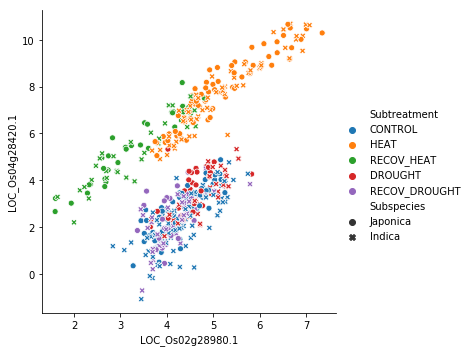

In [46]:
sns_plot =sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1",
            hue="Subtreatment", style="Subspecies", data=combined_merged_df);

sns_plot.savefig("correlation.png", format='png', dpi=300)

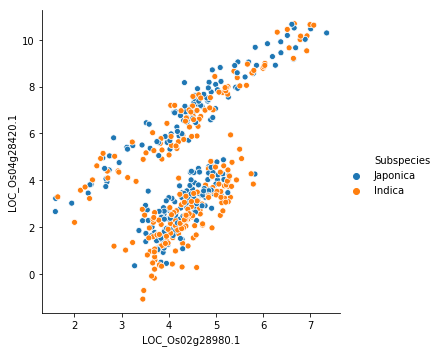

In [47]:
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Subspecies", data=combined_merged_df);

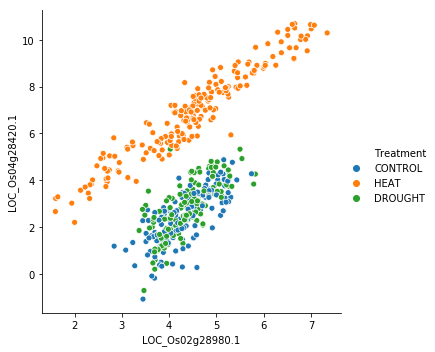

In [48]:
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Treatment", data=combined_merged_df);